In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr # for nice colormaps
import fbs

cmap = cmr.eclipse

# Generating a planar fractional Brownian surface

In [2]:
plane = fbs.PlanarFractionalBrownianSurface(2048, 1024, H=0.5, num_components=30, seed=42)
z = plane.evaluate_grid(2048, 1024, n_threads=2)

1D fBms generated in 0.253 seconds
Using 2 processes


100%|██████████| 30/30 [00:00<00:00, 64.31it/s]


planar fractional Brownian surface generated in 1.064 seconds


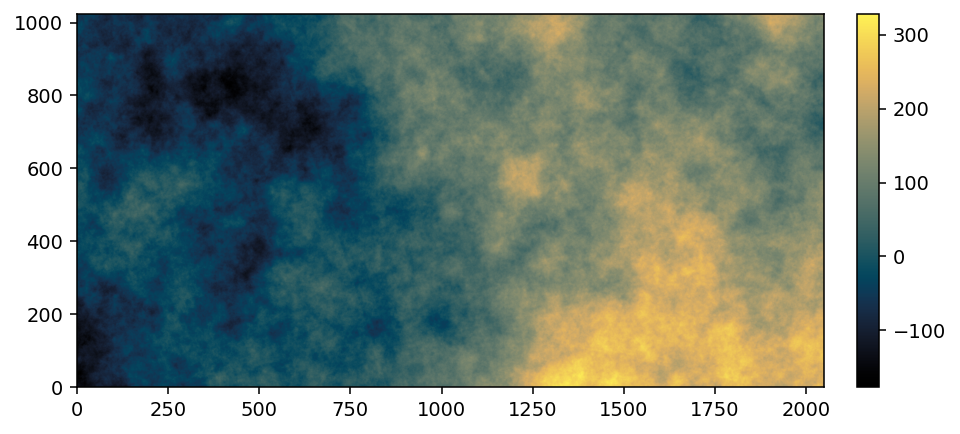

In [3]:
fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(7, 3.2), gridspec_kw={'width_ratios': [7, 0.2]}, layout='tight', dpi=140
)
im = ax.imshow(z, cmap=cmap, origin='lower', aspect='equal')
fig.colorbar(im, cax=cax, orientation='vertical')
fig.savefig('example_pfbs.png', transparent=False, bbox_inches='tight', dpi=140)
plt.show()

# Generating a spherical fractional Brownian surface

In [4]:
sphere = fbs.SphericalFractionalBrownianSurface(2048*64, H=0.5, num_components=100, seed=1)
z = sphere.evaluate_equilateral(1024, n_threads=2)

1D fBms generated in 0.280 seconds
Using 2 processes


100%|██████████| 50/50 [00:05<00:00,  9.03it/s]


spherical fractional Brownian surface calculated in 5.827 seconds


/tmp/ipykernel_2842693/641661490.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = map.pcolor(xx, yy, z, latlon=False, cmap=cmap)


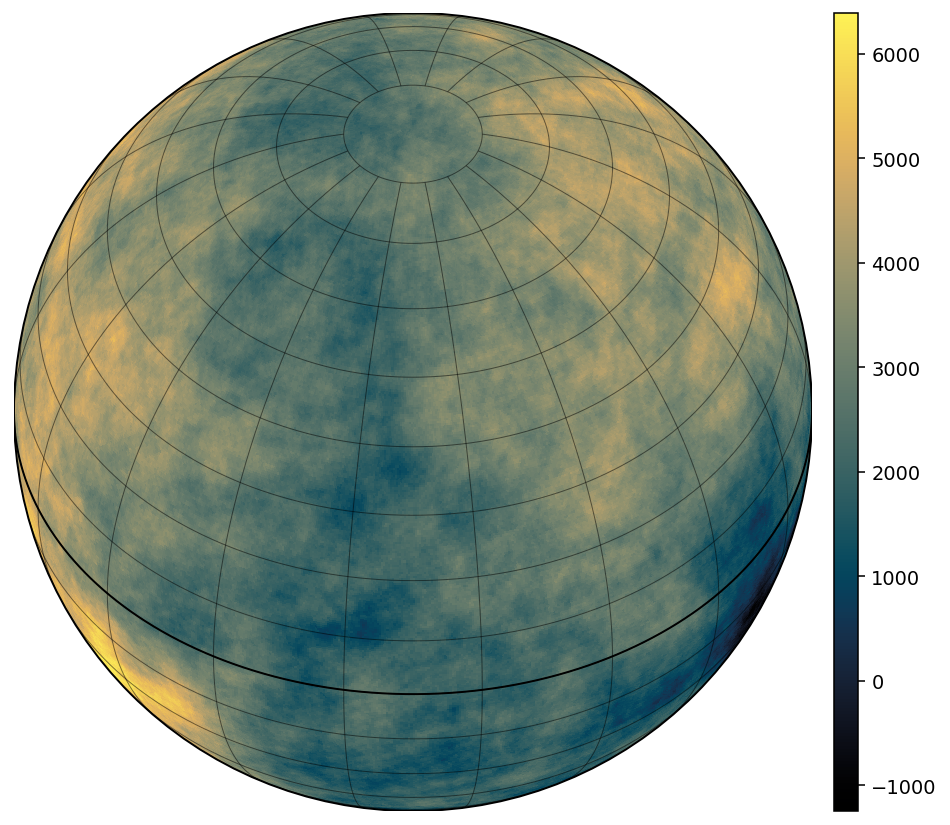

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(7, 6), gridspec_kw={'width_ratios': [7, 0.2]}, dpi=140, layout='tight'
)
map = Basemap(projection='ortho', lon_0=0, lat_0=45, ax=ax)

x = np.linspace(-180, 180, z.shape[1], endpoint=True)
y = np.linspace(-90, 90, z.shape[0], endpoint=True)

xx, yy = np.meshgrid(x, y)
xx,yy = map(xx, yy)

im = map.pcolor(xx, yy, z, latlon=False, cmap=cmap)

parallels = np.arange(-60.,81,10.)

kw = dict(dashes=(1, 0), linewidth=0.5, color=(0, 0, 0, 0.5))
meridians = np.arange(10.,351.,20.)
map.drawparallels(parallels,labels=[False,False,False,False], **kw)
map.drawmeridians(meridians,labels=[False,False,False,False], **kw)
map.drawparallels([0],labels=[False,False, False,False], dashes=(1, 0), linewidth=1, color=(0, 0, 0))

cb = fig.colorbar(im, cax=cax, orientation='vertical')

fig.savefig('example_sfbs_proj_ortho.png', transparent=False, bbox_inches='tight', dpi=140)
plt.show()

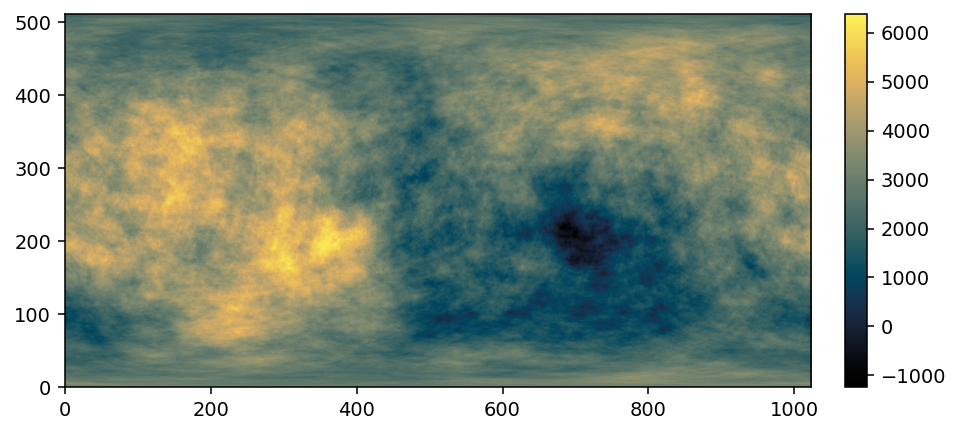

In [6]:
fig, (ax, cax) = plt.subplots(
    1, 2, figsize=(7, 3.2), gridspec_kw={'width_ratios': [7, 0.2]}, layout='tight', dpi=140
)
im = ax.imshow(z, cmap=cmap, origin='lower', aspect='equal')
fig.colorbar(im, cax=cax, orientation='vertical')
fig.savefig('example_sfbs_proj_cyl.png', transparent=False, bbox_inches='tight', dpi=140)
plt.show()